# Emodel: A model to recognize the emotion on face of humans

In [ ]:
import kagglehub
from fastai.vision.all import *
from fastcore.xtras import Path
import matplotlib.pyplot as plt

## Data collection

In [7]:
path = Path('/kaggle/input/fer2013')

## Model Training

In [8]:
faces = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=GrandparentSplitter(train_name='train', valid_name='test'),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms(flip_vert=False, max_rotate=12, max_zoom=1.3, max_lighting=0.4, max_warp=0.4)
).dataloaders(path)

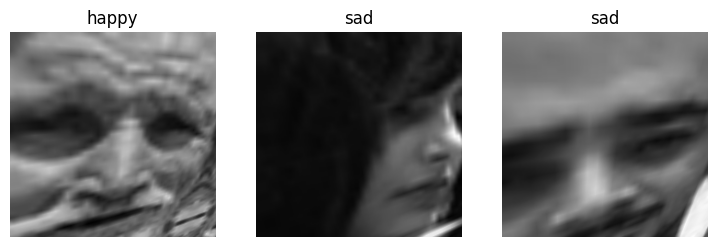

In [9]:
faces.show_batch(max_n=3)
plt.show()

In [10]:
learn = vision_learner(faces, resnet18, metrics=error_rate)
learn.fine_tune(10)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 150MB/s] 


epoch,train_loss,valid_loss,error_rate,time
0,1.904566,1.618351,0.623990,01:32


epoch,train_loss,valid_loss,error_rate,time
0,1.529225,1.284474,0.491084,01:52
1,1.338774,1.131987,0.435358,01:54
2,1.230576,1.084110,0.407077,01:54
3,1.162854,1.037207,0.389663,01:53
4,1.113773,0.982933,0.372945,01:54
5,1.028656,0.952757,0.356506,01:54
6,0.995785,0.919742,0.342714,01:54
7,0.961352,0.901975,0.339928,01:54
8,0.931290,0.891045,0.328922,01:54
9,0.924325,0.889402,0.331151,01:54


## Analysis of Training results

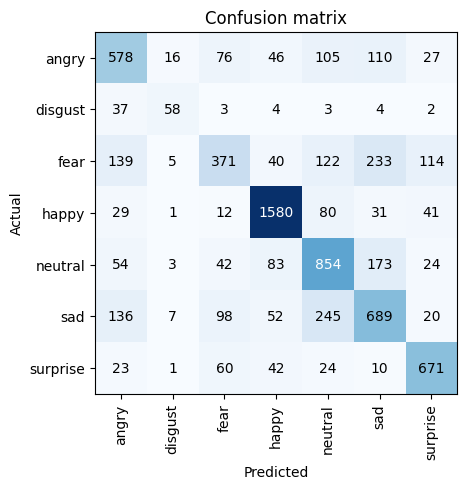

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [12]:
interp.most_confused(min_val=2)

[('sad', 'neutral', np.int64(245)),
 ('fear', 'sad', np.int64(233)),
 ('neutral', 'sad', np.int64(173)),
 ('fear', 'angry', np.int64(139)),
 ('sad', 'angry', np.int64(136)),
 ('fear', 'neutral', np.int64(122)),
 ('fear', 'surprise', np.int64(114)),
 ('angry', 'sad', np.int64(110)),
 ('angry', 'neutral', np.int64(105)),
 ('sad', 'fear', np.int64(98)),
 ('neutral', 'happy', np.int64(83)),
 ('happy', 'neutral', np.int64(80)),
 ('angry', 'fear', np.int64(76)),
 ('surprise', 'fear', np.int64(60)),
 ('neutral', 'angry', np.int64(54)),
 ('sad', 'happy', np.int64(52)),
 ('angry', 'happy', np.int64(46)),
 ('neutral', 'fear', np.int64(42)),
 ('surprise', 'happy', np.int64(42)),
 ('happy', 'surprise', np.int64(41)),
 ('fear', 'happy', np.int64(40)),
 ('disgust', 'angry', np.int64(37)),
 ('happy', 'sad', np.int64(31)),
 ('happy', 'angry', np.int64(29)),
 ('angry', 'surprise', np.int64(27)),
 ('neutral', 'surprise', np.int64(24)),
 ('surprise', 'neutral', np.int64(24)),
 ('surprise', 'angry', np.in

## Testing model


In [20]:
from fastdownload import download_url 
from fastai.vision.all import PILImage as viewer


<Axes: >

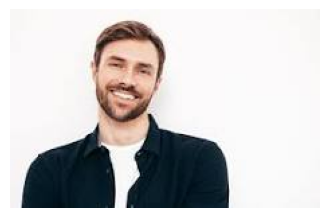

In [23]:
testpic = "/kaggle/input/picture-of-someone-smiling/picture of someone smiling.jpeg"
image = viewer.create(testpic)
image.show()

In [26]:
prediction,_,prob_of_pred = learn.predict(image)
print(f'Emotion: {prediction}\nProbability: {prob_of_pred}')

Emotion: fear
Probability: tensor([0.2479, 0.0124, 0.2592, 0.1347, 0.0810, 0.0546, 0.2102])


## Deployment